In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from helpers import cross_validation

from sklearn.cluster import KMeans

from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

In [2]:
df = pd.read_csv('../data/processed_data/data_0.csv')

In [3]:
df['LATITUDE'] = df['LATITUDE'].clip(lower=40.69, upper=40.88)
df['LONGITUDE'] = df['LONGITUDE'].clip(lower=-74.03, upper=-73.9)

In [4]:
km = KMeans(n_clusters=84, random_state=2022)
km.fit(df[['LATITUDE', 'LONGITUDE']]);

In [5]:
df['CLUSTER'] = km.labels_

In [6]:
most_accidents = df.groupby('CLUSTER')['CASUALTY'].mean().loc[lambda x: x > df['CASUALTY'].mean()].index

In [7]:
arr = np.unique(km.labels_)
filtered = arr[~np.isin(arr, most_accidents)]
colors = pd.concat([pd.Series(0, index=filtered), pd.Series(1, index=most_accidents)])

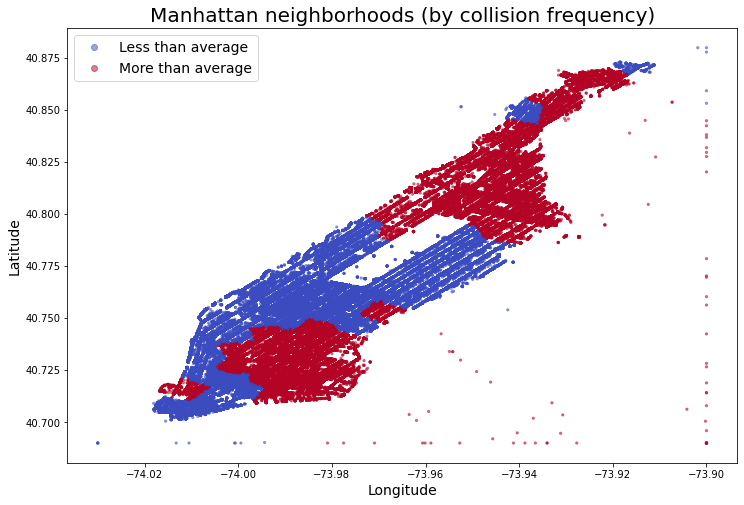

In [9]:
fig, ax = plt.subplots(1, figsize=(12, 8))
im = ax.scatter(df['LONGITUDE'], df['LATITUDE'], c=df['CLUSTER'].map(colors), cmap='coolwarm', s=5, alpha=0.5)
ax.set_xlabel('Longitude', fontsize=14)
ax.set_ylabel('Latitude', fontsize=14)
ax.set_title('Manhattan neighborhoods (by collision frequency)', fontsize=20)
ax.legend(handles=im.legend_elements()[0], labels=['Less than average', 'More than average'], fontsize=14);

In [10]:
fig.savefig('../images/clusters_2.png', transparent=True, bbox_inches="tight");

## Test a model

In [11]:
df['CLUSTER'] = df['CLUSTER'].map(colors)
X = pd.get_dummies(df.drop(columns=['CASUALTY', 'CRASH_DATETIME', 'LATITUDE', 'LONGITUDE']), columns=['CLUSTER'], drop_first=True)
y = df['CASUALTY']

print("5-Fold Cross Validation Average F1-score =", cross_val_score(RandomForestClassifier(n_jobs=-1), X, y, scoring='f1').mean())

5-Fold Cross Validation Average F1-score = 0.10419171904132081


In [ ]:
df.to_csv('../data/processed_data/data_2.csv', index=False)